<a href="https://colab.research.google.com/github/nhatchung14/PythonNotebooks/blob/master/KNN-diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [181]:
%cd 'My Drive'/'Colab Notebooks'/Lab6


/gdrive/My Drive/Colab Notebooks/Lab6


In [0]:
import numpy as np
import pandas as pd
# load dataset Iris.csv 
# https://www.kaggle.com/uciml/iris
# dataset = pd.read_csv('Iris.csv')               # Iris.csv
dataset = pd.read_csv('diabetes.csv')             # diabetes.csv

### 0: Data knowledge

In [183]:
# get how many instances (rows) and how many attributes (columns)
dataset.shape

(768, 9)

In [184]:
#show BASIC INFORMATION: max, min, mean của các columns trong dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [185]:
#SHOW ALLS
dataset.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [186]:
# SHOW THE FIRST COLUOMS
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [187]:
# SHOW THE FEW LAST COLOUMS
dataset.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [188]:
# T number of instances (rows) that belong to each class. 
# dataset.groupby('Species').size()               # Iris.csv
dataset.groupby('Outcome').size()                 # diabetes.csv

Outcome
0    500
1    268
dtype: int64

### 1: Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

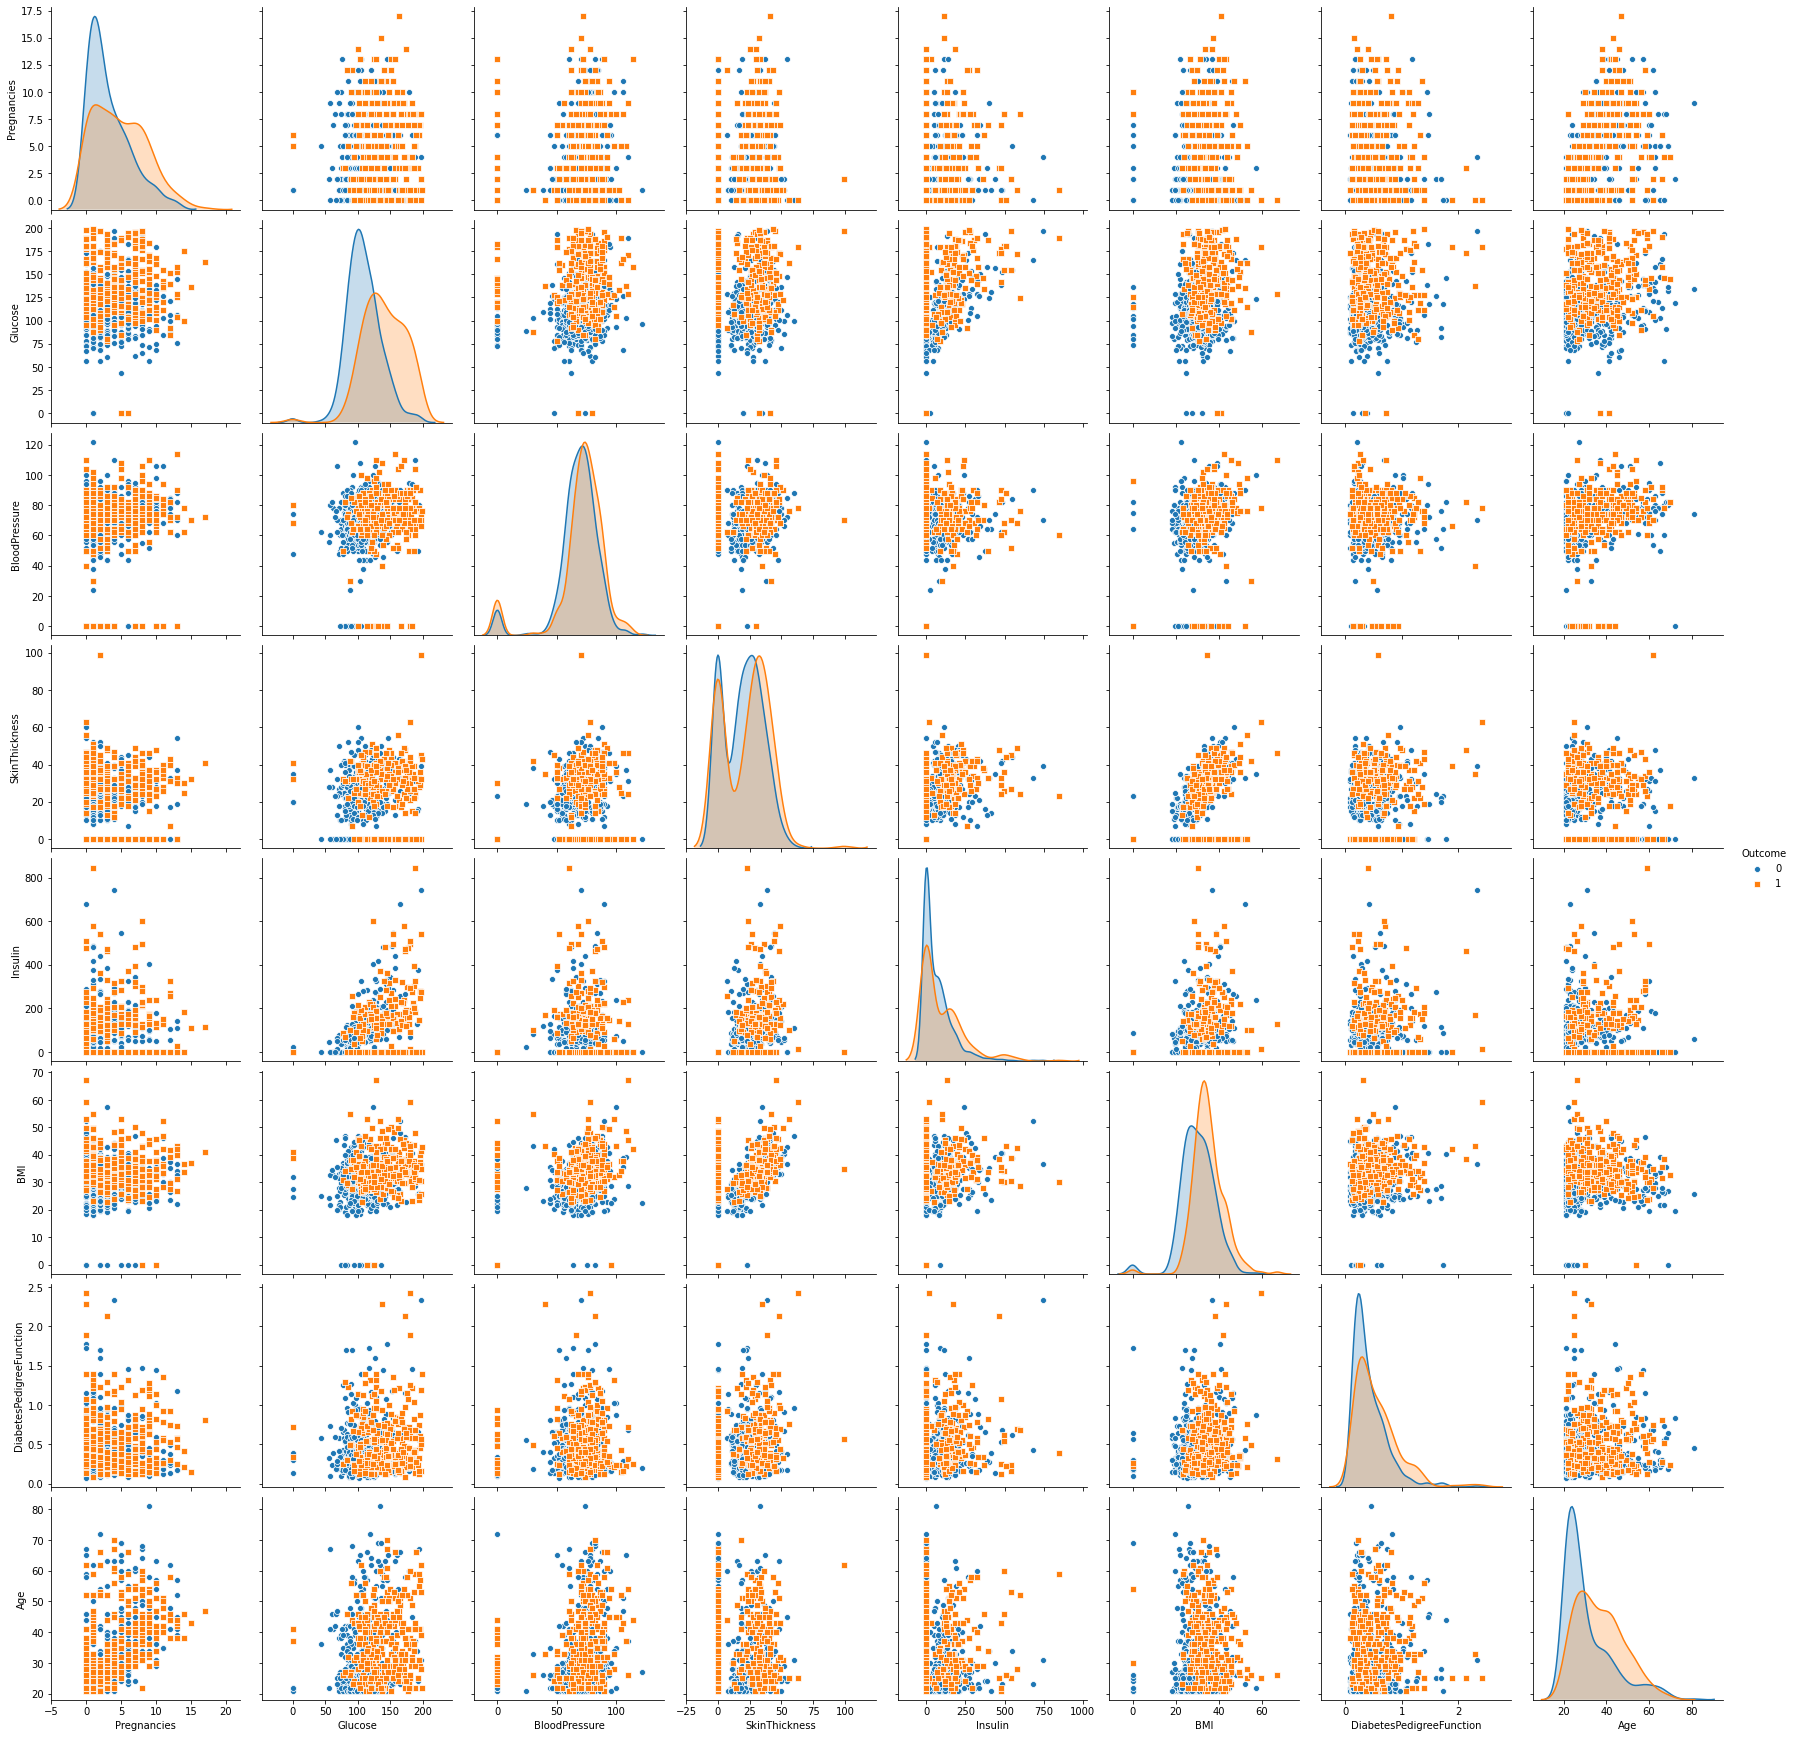

In [190]:
#PAIRPLOT
# sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])   # Iris.csv
sns.pairplot(dataset, hue = "Outcome", height=3, markers=["o", "s"])                             # diabetes.csv
plt.show()

<Figure size 432x288 with 0 Axes>

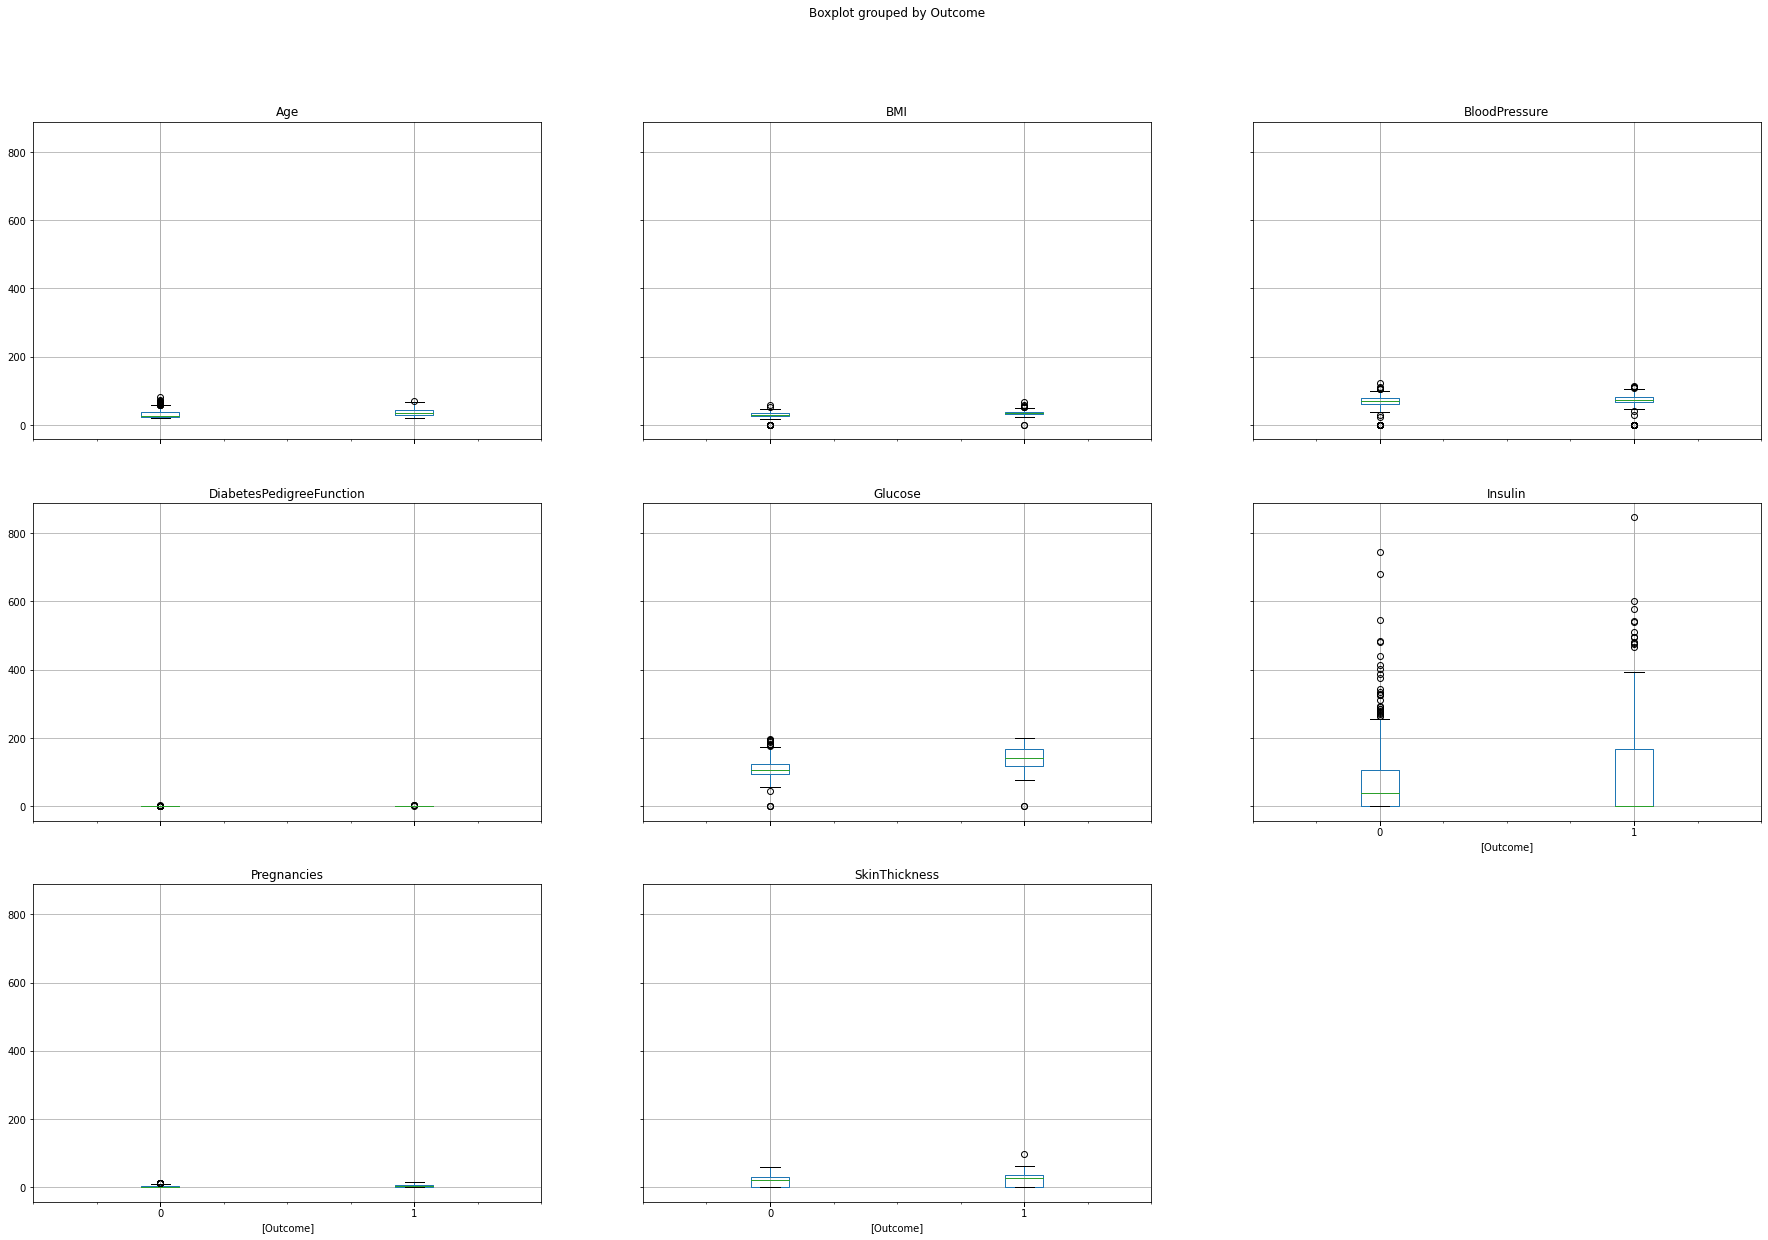

In [191]:
plt.figure()
# dataset.boxplot(by="Species", figsize=(30, 20))         # Iris.csv
dataset.boxplot(by="Outcome", figsize=(30, 20))           # diabetes.csv
plt.show()

### 2: Data preprocessing

In [0]:
# determine features and labels

# Iris.csv
# feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
# X = dataset[feature_columns].values
# y = dataset['Species'].values

# diabetes.csv 
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = dataset[feature_columns].values
y = dataset['Outcome'].values


In [0]:
# Labels are categorical variables. Therefore, we have to transform them into a numeric format as KNeighborsClassifier does not accept string labels

# (string) 0 correspond to 0
# (string) 1 correspond to 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yl = le.fit_transform(y)

In [194]:
# Spliting dataset into training set and test set
# training set: to build classifier
# test set: to evaluate classifier  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, yl, test_size = 0.2, random_state = 0)
print(X_train.shape) # 80% rows dùng để train
print(y_train.shape)
print(X_test.shape) # 20% rows dùng để test
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


### 3: Using KNN 


In [0]:
# build model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [0]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

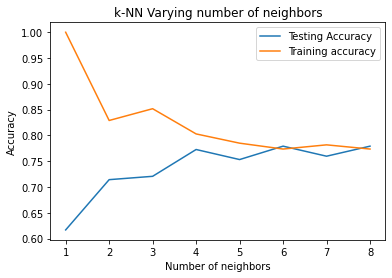

In [197]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

### 4: Evaluating the model for the test set

In [198]:
# model (k = 1)
classifier = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [199]:
# Predicting on the test set
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [200]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[74, 33],
       [26, 21]])

In [201]:
#Option 1
#Sử dụng hàm accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 61.69 %.


In [202]:
# Option 2
# acccuracy_byhand = (11+13+6)/(11+13+6+0+0+0+0)         # Iris.csv
acccuracy_byhand = (74+21)/(74+26+33+21)                 # diabetes.csv
acccuracy_byhand

0.6168831168831169

In [203]:
#Option 3
classifier.score(X_test, y_test)

0.6168831168831169

In [204]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       107
           1       0.39      0.45      0.42        47

    accuracy                           0.62       154
   macro avg       0.56      0.57      0.57       154
weighted avg       0.63      0.62      0.62       154

